In [80]:
import numpy as np
import sdeint
import os

import scipy.fftpack as fftpack
import scipy.sparse as sp
from scipy.optimize import minimize
from scipy import integrate as ig

import matplotlib as mpl
from matplotlib import gridspec, rc

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.collections import LineCollection

from sklearn.decomposition import PCA
import copy
import glob
#import PyDSTool as ds
from importlib import reload

import sys
# the mock-0.3.1 dir contains testcase.py, testutils.py & mock.py
sys.path.append('/Users/simonfreedman/cqub/bifurc/paper_figs')
import myfun as mf


rc('font',**{'family':'sans-serif','sans-serif':['Arial']})

mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'

In [3]:
half_sqrt3 = np.sqrt(3)/2.
hex_sym = lambda x,y,k: (np.cos(k*half_sqrt3*y+0.5*x)+np.cos(k* half_sqrt3*y-0.5*x) + np.cos(k*x))/3.


In [4]:
#print(np.fft.fftfreq.__doc__)

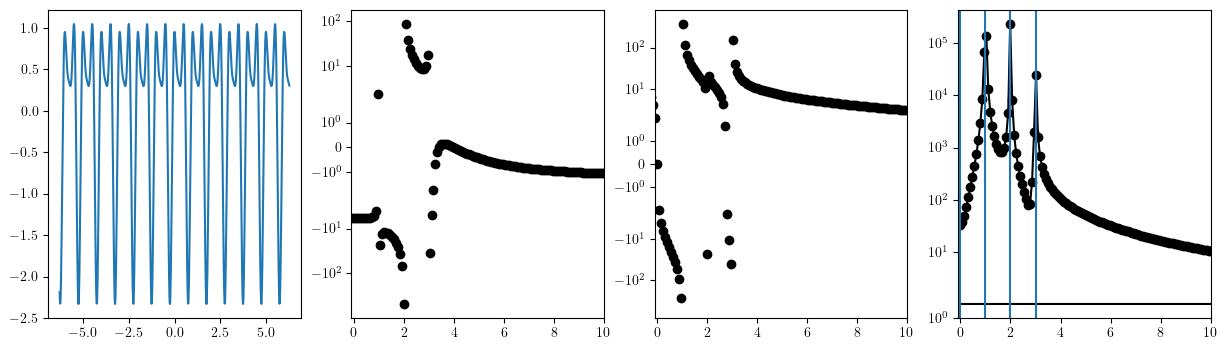

In [5]:
x=np.linspace(-2*np.pi,2*np.pi,1001)
z = np.sin(2*np.pi*x)+np.cos(4*np.pi*x)+np.sin(6*np.pi*x-3)/3#+np.cos(x/4)
zf = np.fft.fft(z)
xf = np.fft.fftfreq(x.shape[0],np.mean(np.diff(x)))
fig,axs=plt.subplots(1,4,figsize=(15,4))
axs[0].plot(x,z)
axs[1].plot(xf, zf.real,'ko')
axs[2].plot(xf, zf.imag,'ko')
axs[3].plot(xf, np.real(zf*np.conjugate(zf)),'ko-')
for i in range(1,4):
    axs[i].set_yscale('symlog')
    axs[i].set_xlim(-0.1,10)
for i in range(4):
    axs[3].axvline(i)
    
plt.show()

In [ ]:
x=np.linspace(-2*np.pi,2*np.pi,1001)
z = np.sin(2*x)+np.cos(4*x)+np.sin(6*np.pi*x-3)/3#+np.cos(x/4)
zf = np.fft.fft(z)
xf = np.fft.fftfreq(x.shape[0],np.mean(np.diff(x)))
fig,axs=plt.subplots(1,4,figsize=(15,4))
axs[0].plot(x,z)
axs[1].plot(xf, zf.real,'ko')
axs[2].plot(xf, zf.imag,'ko')
axs[3].plot(xf, np.real(zf*np.conjugate(zf)),'ko-')
for i in range(1,4):
    axs[i].set_yscale('symlog')
    axs[i].set_xlim(-0.1,10)
for i in range(4):
    axs[3].axvline(i)
    
plt.show()

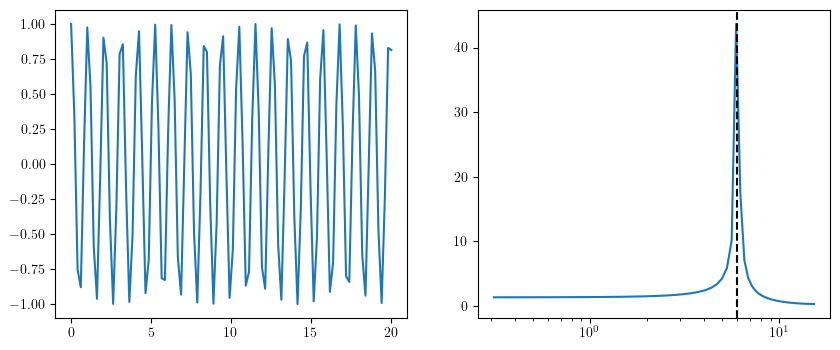

In [75]:
fig,axs=plt.subplots(1,2,figsize=(10,4))
n = 100
w = 6
x = np.linspace(0,20,n)
dx = x[1]-x[0]
L = np.amax(x)-np.amin(x)
y = np.cos(w*x)
axs[0].plot(x, y)
ffty = np.fft.fft(y)
freqs = np.fft.fftfreq(n,dx)
axs[1].plot(freqs[1:int(n/2)]*(2*np.pi), np.abs(ffty[1:int(n/2)]))
axs[1].axvline(w,linestyle='--', color='k')
axs[1].set_xscale('log')
plt.show()

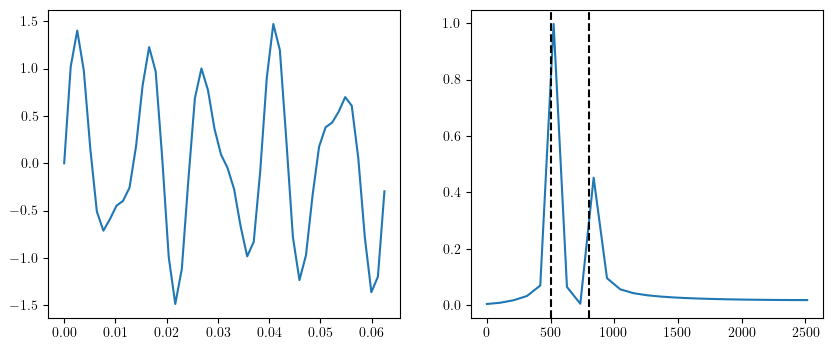

In [97]:
# Number of samplepoints
N = 50
# sample spacing
T = 1.0 / 800.0 # = L * sample_freq
x = np.linspace(0.0, N*T, N)
y = np.sin(500.0 *x) + 0.5*np.sin(800.0 *x)
#yf = fftpack.fft(y)
yf = np.fft.fft(y)

xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))*2*np.pi

fig, axs = plt.subplots(1,2, figsize=(10,4))
axs[0].plot(x,y)
axs[1].plot(xf, 2.0/N * np.abs(yf[:N//2]))
axs[1].axvline(500,color='k', linestyle='--')
axs[1].axvline(800,color='k', linestyle='--')

plt.show()

In [91]:
np.amax(xf), np.amax(x)

(400.0, 0.75)

In [258]:
x=np.linspace(-8*np.pi,8*np.pi,1001)
y=np.linspace(-8*np.pi,8*np.pi,1001)
xx,yy = np.meshgrid(x,y)
z=10*np.cos(np.pi/2*xx)#+10*np.cos(np.pi*yy) #hex_sym(xx,yy,np.pi)

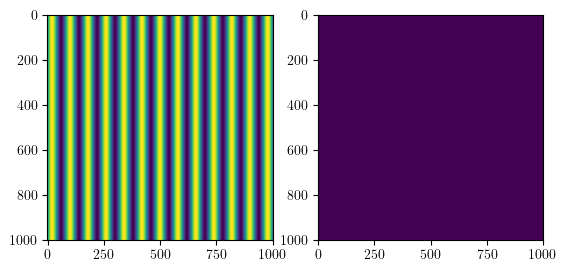

In [259]:
zf = np.fft.fft2(z)
xf = np.fft.fftfreq(x.shape[0],np.mean(np.diff(x)))
yf = np.fft.fftfreq(y.shape[0],np.mean(np.diff(y)))
zf_pow = np.abs(zf) #np.sqrt(np.real(zf*np.conjugate(zf)))
#zf_pow = np.abs(zf_pow - np.amax(zf_pow))
fig,axs=plt.subplots(1,2)
axs[0].imshow(z)
axs[1].imshow(zf_pow)
plt.show()

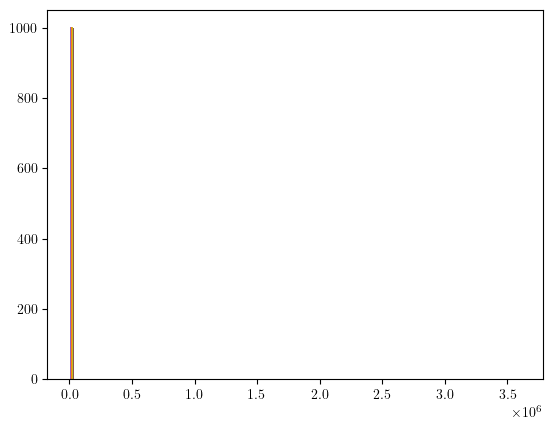

In [262]:
fig,axs=plt.subplots()
axs.hist(zf_pow.real,bins=100)
axs.set_yscale('log')
plt.show()

In [237]:
stepx = np.mean(np.diff(x))
stepy = np.mean(np.diff(y))
zf_pow_sc = zf_pow * stepx*stepy/(x.shape[0]*y.shape[0])

In [238]:
np.array_equal(np.sqrt(zf_pow), np.abs(zf))

False

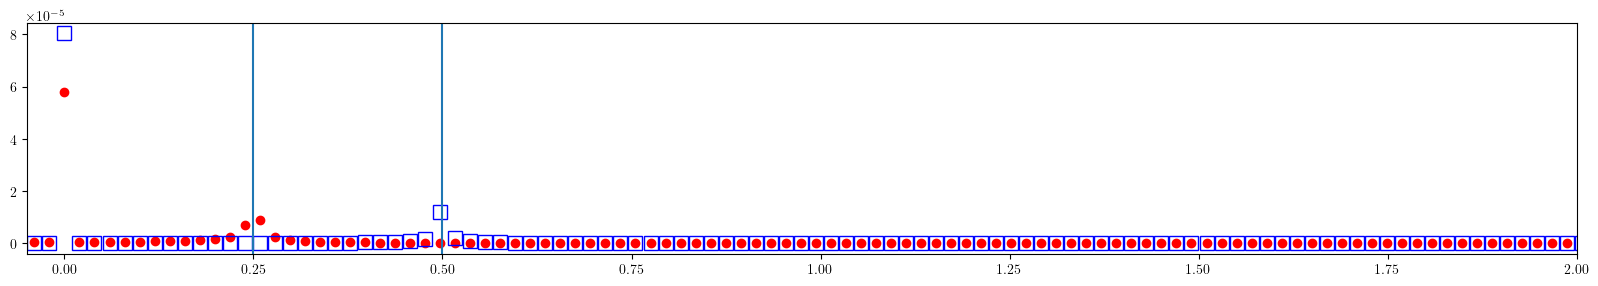

In [239]:
fig,axs=plt.subplots(figsize=(20,3))
axs.plot(xf,np.mean(zf_pow_sc,axis=0),'ro')
axs.plot(yf,np.mean(zf_pow_sc,axis=1),'bs', fillstyle='none', markersize=10)

#axs.set_yscale('log')
axs.axvline(0.5)
axs.set_xlim(-0.05,2)
axs.axvline(0.25)
plt.show()

In [225]:
xf, zf_pow.shape

(array([ 0.        ,  0.01987449,  0.03974899, ..., -0.05962348,
        -0.03974899, -0.01987449]),
 (1001, 1001))

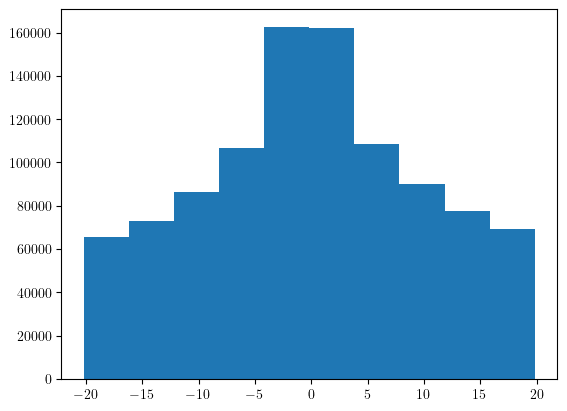

In [203]:
fig,axs=plt.subplots()
axs.hist((z-np.mean(z)).reshape(-1))
plt.show()

In [128]:
np.array_equal(xf,yf)

True

In [35]:
sp = np.fft.fft2(z)
freqx = np.fft.fftfreq(xx.shape[-1])
freqy = np.fft.fftfreq(yy.shape[-1])

In [36]:
sp_power = np.real(sp*np.conjugate(sp))

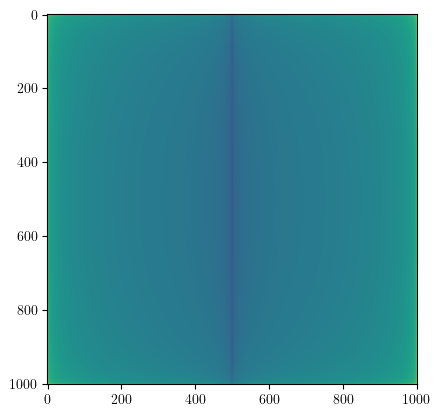

In [37]:
fig,axs=plt.subplots()
axs.imshow(np.log10(sp_power))
plt.show()

In [7]:
freqx.shape

(1001,)

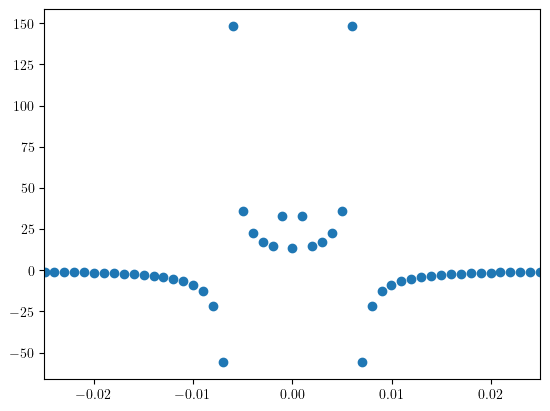

In [8]:
fig,axs=plt.subplots()
axs.plot(freqx, np.mean(sp.real,axis=0),'o')
axs.set_xlim(-0.025,0.025)
plt.show()

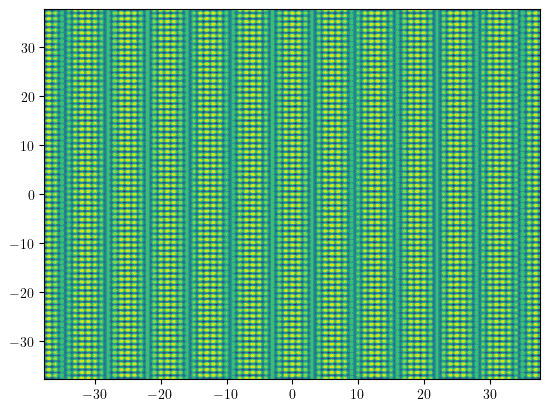

In [27]:
fig,axs=plt.subplots()
axs.contourf(x,y,z)
plt.show()